# 1. 차원 축소(Dimension Reduction) 개요

* 이 장에서는 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF에 대해 알아볼 것임<br><br>

* 차원의 저주<br>
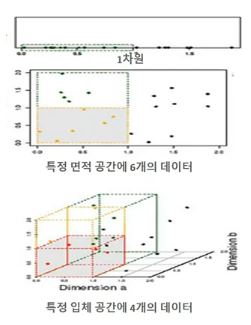<br>
 * 차원이 커질수록, 데이터 포인트들간 거리가 크게 늘어나고, 데이터가 희소화(Sparse)됨
 * 수백 ~ 수천개 이상의 피처로 구성된 포인트들간 거리에 기반한 ML 알고리즘이 무력화됨
 * 또한, 피처가 많을 경우 개별 피처간의 상관관계가 높아 선형 회귀와 같은 모델에서는 다중 공선성 문제로 모델의 예측 성능이 저하될 가능성이 높음<br><br>
 
* 차원 축소의 장점
 * 학습 데이터 크기를 줄여서 학습 시간 절약
 * 불필요한 피처들을 줄여서 모델 성능 향상에 기여(주로 이미지 관련 데이터)
 * 다차원의 데이터를 3차원 이하의 차원 축소를 통해서 시각적으로 보다 쉽게 데이터 패턴 인지<br>
 => 어떻게 하면 원본 데이터의 정보를 최대한으로 유지한 채로 차원 축소를 수행할 것인가?<br><br>
 
* 피처 선택과 피처 추출
 * 일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)으로 나눌 수 있음<br>
 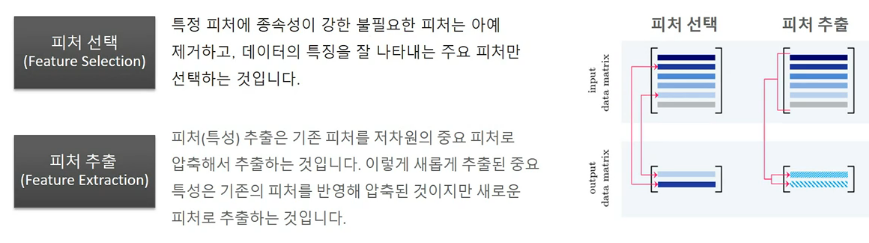<br><br>
 
* 피처 추출(Feature Extraction)
 * 피처 추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것<br>
 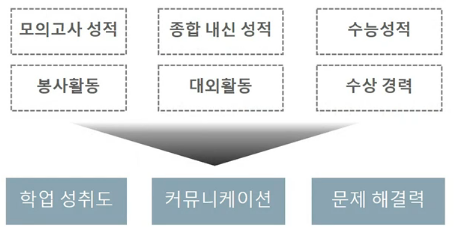<br><br>
 
* 차원 축소의 의미
 * 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아님
 * 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적(latent)인 요소를 추출하는 데 있음
   * 추천 엔진
   * 이미지 분류 및 변환
   * 문서 토픽 모델링

# 2. PCA(Principal Component Analysis)
* PCA 이해
 * 고차원의 원본 데이터를 `저차원의 부분 공간으로 투영`하여 데이터를 축소하는 기법
 * 예를 들어 10차원의 데이터를 2차원의 부분 공간으로 투영하여 데이터를 축소
 * PCA는 원본 데이터가 가지는 데이터 변동성을 가장 중요한 정보로 간주하며 이 변동성에 기반한 원본 데이터 투영으로 차원 축소를 수행<br>
 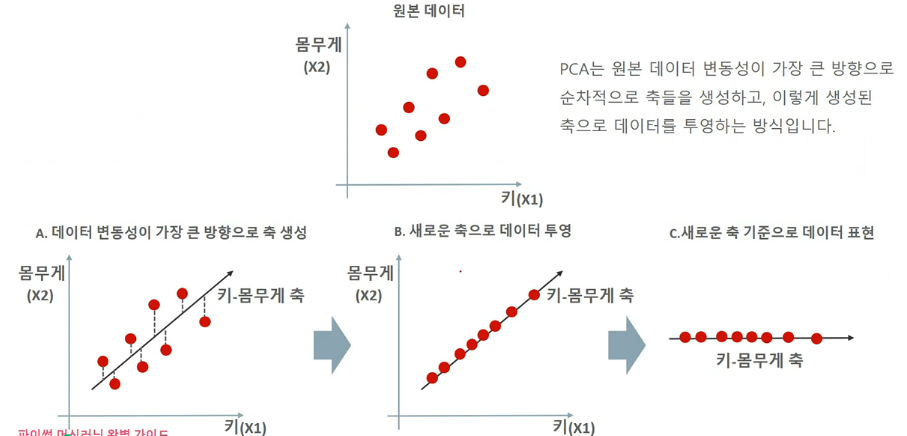<br>
 * PCA는 제일 먼저 원본 데이터에 가장 큰 데이터 변동성(variance)를 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 첫 번째 축을 제외하고 그 다음으로 변동성이 큰 축을 설정하는 데 이는 첫번째 축에 직각이 되는 벡터(직교 벡터) 축
 * 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성
 * 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨<br>
 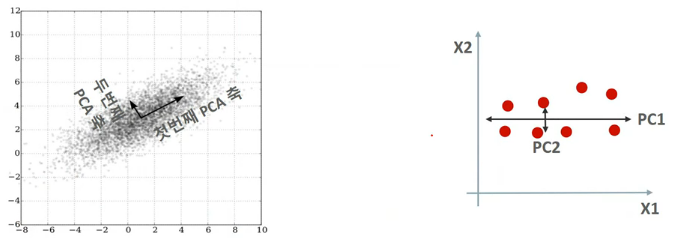<br>
 * PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석기법

* PCA 변환
 * PCA를 선형대수 관점에서 해석해보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것<br>
 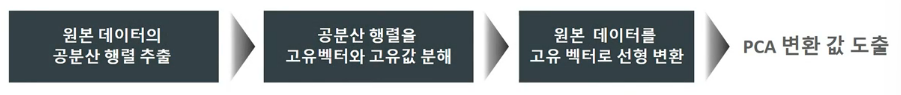<br>
 * 고유벡터는 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
 * 고유값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄

* 공분산 행렬
 * 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동성을 의미함
 * 즉, 사람 키 변수를 X, 몸무게 변수를 Y라고 하면, 공분산 Cov(X, Y) > 0은 X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미<br>
 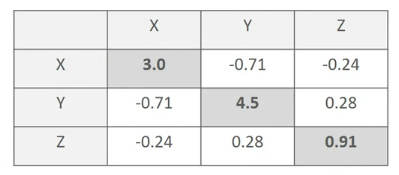<br>
 * 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이며 대칭 행렬
 * 정방행렬은 열과 행의 크기가 같은 행렬을 지칭하는데, 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬, 즉 At = A인 행렬을 대칭행렬이라고 부름

* 선형 변환과 고유 벡터/고유값
 * 일반적으로 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미
 * 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것
 * 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭
 * 즉, Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)임
 * 이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음
 * 예를 들어 2 x 2 행렬은 두 개의 고유벡터를, 3 x 3 행렬은 3개의 고유벡터를 가질 수 있음
 * 이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용됨<br>
 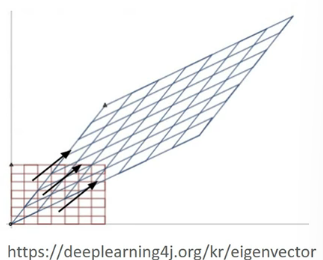

* 공분산 행렬의 고유값 분해
 * 공분산 행렬은 대칭행렬인데, 대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있음
 * 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있다는 것
 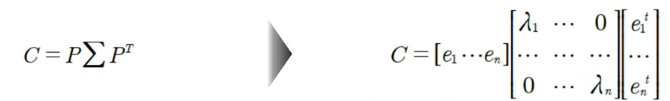<br>
 * P는 n x n의 직교행렬이며, Σ는 n x n 정방행렬, Pt는 행렬 P의 전치 행렬
 * 공분산 C는 고유벡터 직교 행렬, 고유값 정렬 행렬, 고유벡터 직교 행렬의 전치행렬로 분해됨
 * ei는 i번째 고유벡터를, λi는 i번째 고유벡터의 크기를 의미
 * 고유벡터는 바로 PCA의 축
 * e1는 가장 분산이 큰 방향을 가진 고유벡터이며, e2는 e1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

* PCA 변환과 수행 절차
 * PCA 변환 : 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
 * PCA 변환 수행 절차
   * 1. 입력 데이터 세트의 공분산 행렬을 생성
   * 2. 공분산 행렬의 고유벡터와 고유값을 계산
   * 3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출
   * 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

* 사이킷런 PCA 클래스의 이해
 * `sklearn.decomposition.PCA(n_components = None, copy = True, whiten = False, svd_solver = 'auto', tol = 0.0, iterated_power = 'auto', random_state = None)`
 * n_components는 PCA 축의 개수, 즉 변환 차원을 의미
 * PCA를 적용하지 전에 입력 데이터의 개별 피처들을 스케일링해야 함
 * PCA는 여러 피처들의 값을 연산해야 하므로 피처들의 스케일에 영향을 받음
 * 따라서, 여러 속성을 PCA로 압축하지 전에 각 피처들의 값을 동일한 스케일로 변환해야하며, 일반적으로 평균이 0, 분산이 1인 표준 정규 분포로 변환함
 * PCA 변환이 완료된 사이킷런 PCA 객체는 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 explained_variance_ratio_ 속성으로 제공함

### 1. 붓꽃 데이터로 PCA 변환
*  데이터 로딩 및 시각화

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


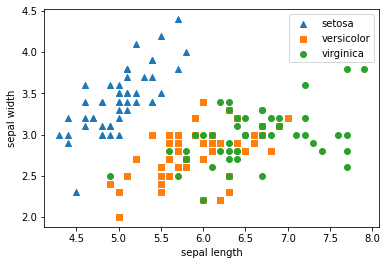

In [8]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

* 평균이 0, 분산이 1인 정규분포로 원본 데이터를 변환

In [9]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [10]:
iris_scaled.shape

(150, 4)

* PCA 변환 수행

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit(), transform()을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [12]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


* PCA로 차원 축소된 피처들로 데이터 산포도 시각화

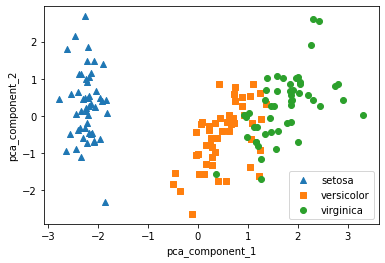

In [13]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

* 각 PCA component별 변동성 비율

In [14]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


=> 첫 번째 PCA 변환 요소가 전체 변동성의 약 72.9%를 차지하며, 두 번째가 약 22.8%를 차지함<br>
=> 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음


* 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print('원본 데이터 교차 검증 개별 정확도 :', scores)
print('원본 데이터 평균 정확도 :', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96


In [17]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3)
print('원본 데이터 교차 검증 개별 정확도 :', scores_pca)
print('원본 데이터 평균 정확도 :', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
원본 데이터 평균 정확도 : 0.88


=> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음<br>
=> 위 데이터의 경우 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능 정확도가 원본 데이터 대비 약 8% 하락<br>
=> 8%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당부분 유지하고 있음을 알 수 있음

### 2. 신용카드 데이터 세트 PCA 변환

* 데이터 로드 및 컬럼명 변환

In [18]:
# header로 의미없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd
pd.set_option('display.max_columns', 30)

df = pd.read_excel('pca_credit_card.xls', header = 1, sheet_name = 'Data').iloc[:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [19]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis = 1)

* 피처간 상관도 시각화

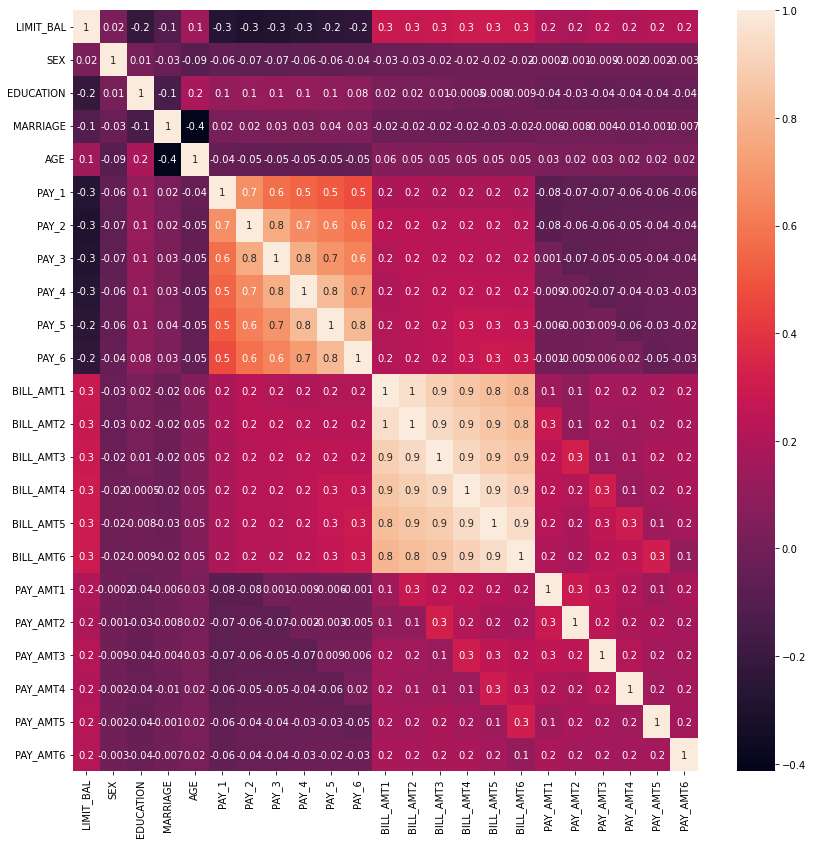

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))

sns.heatmap(corr, annot = True, fmt = '.1g') # annot는 상관계수 표현 여부, fmt는 소수점 몇번째 자리까지 표현
plt.show()

=> BILL_AMT1 ~ BILL_AMT6의 6개의 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음<br>
=> 이보다는 낮지만 PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높음<br>
=> 이렇게 높은 상관도를 가진 속성들을 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

* BILL_AMT1 ~ BILL_AMT6까지 6개 속성만을 이용해 PCA 변환 수행

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위한 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성 :', pca.explained_variance_ratio_)

대상 속성명 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


=> 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며, 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개의 속성의 상관도가 매우 높음 

* 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv = 3)

print('CV = 3인 경우의 개별 Fold 세트별 정확도 :', scores)
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold 세트별 정확도 : [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = 'accuracy', cv = 3)

print('CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 :', scores_pca)
print('PCA 변환된 데이터 셋 평균 정확도 : {0:.4f}'.format(np.mean(scores_pca)))

CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 : [0.7903 0.7971 0.8027]
PCA 변환된 데이터 셋 평균 정확도 : 0.7967


=> 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생<br>
=> 전체 속성의 1/4 정도만으로도 이 정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여줌

# 3. LDA(Linear Discriminant Analysis)
* LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사
* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
* PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
* LDA는 같은 클래스의 데이터는 최대한 근접해서, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑을 함<br>
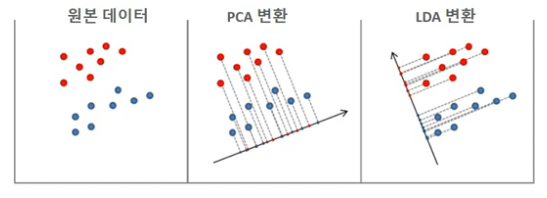<br><br>

* LDA의 차원 축소 방식
 * LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함
 * 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식<br>
 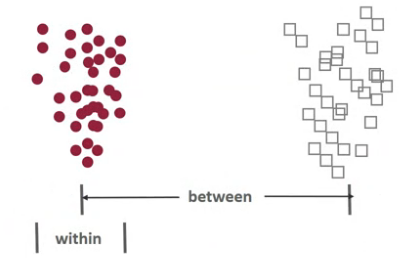

* LDA 절차
 * 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 앞에서 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유 벡터를 구하고 입력 데이터를 투영한다는 점<br>
 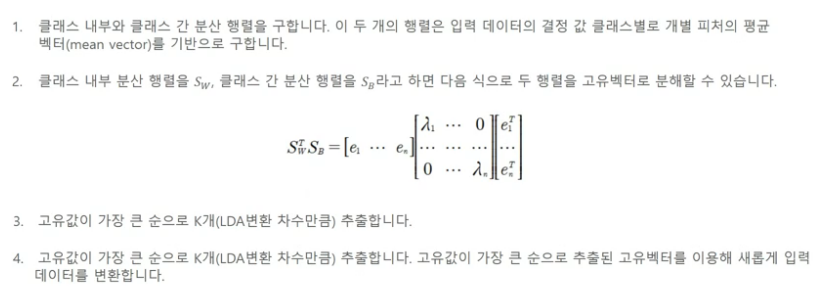

### 붓꽃 데이터셋에 LDA 적용하기

* 데이터 세트 로드 및 표준 정규 분포로 스케일링

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

* LDA 변환
 * PCA와 다르게 한 가지 유의해야 할 점은 LDA는 실제로는 PCA와 다르게 비지도하습이 아닌 지도학습이라는 것
 * 즉, 클래스의 결정값이 변환 시에 필요함
 * lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의

In [2]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target) # fit() 호출 시 target값 필요
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


* LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

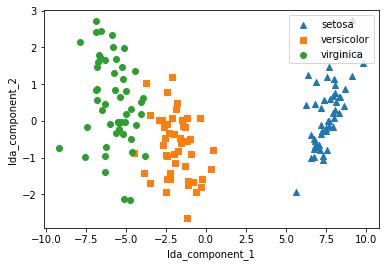

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target별로 다른 shape으로 scatter plot을 그림
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

=> PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아있음을 알 수 있음

# 4. SVD(Singular Value Decomposition)
* 대표적인 행렬 분해 방법<br>
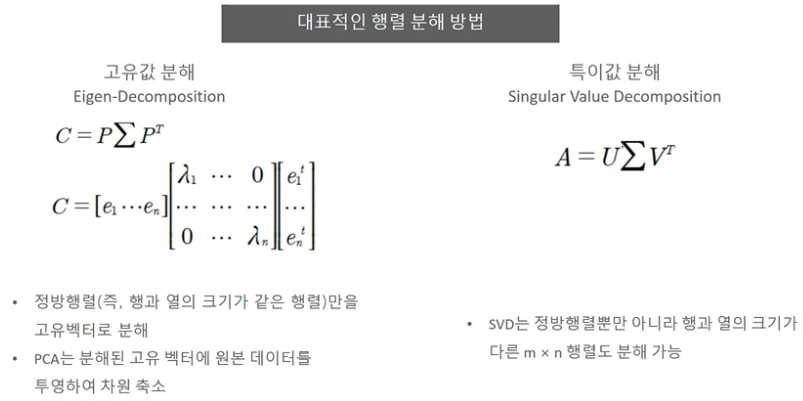<br>
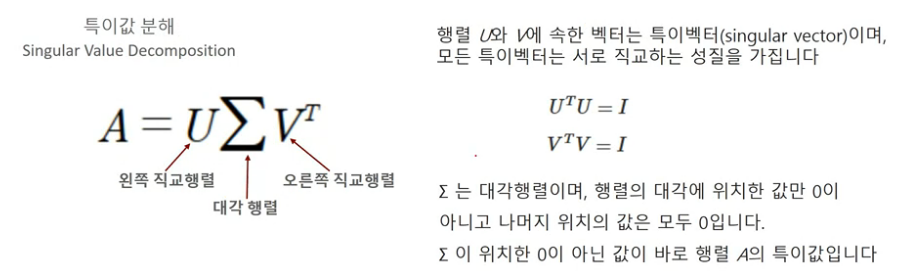<br><br>

* SVD 유형<br>
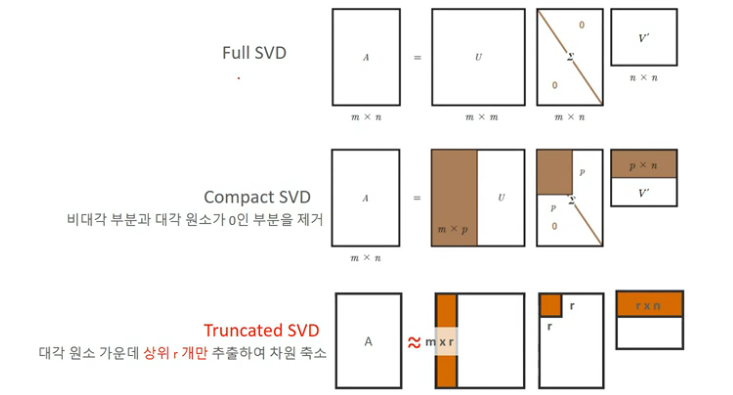<br><br>

* Truncated SVD 행렬 분해 의미<br>
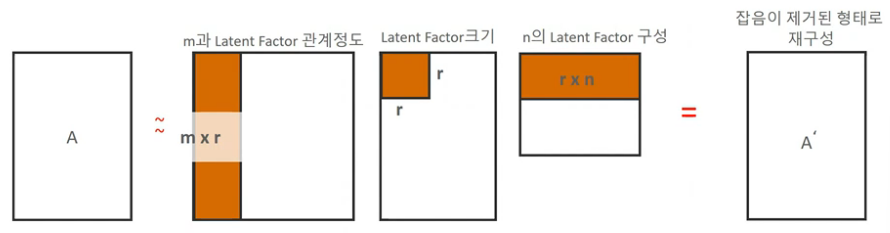<br>
 * SVD는 차원 축소를 위한 행렬 분해를 통해 `Latent Factor(잠재 요인)`을 찾을 수 있는데 이렇게 찾아진 Latent Factor는 많은 분야에 활용(추천 엔진, 문서의 잠재 의미 분석 등)
 * SVD로 차원 축소 행렬 분해된 후 다시 분해된 행렬을 이용하여 원복된 데이터 셋은 잡음(Noise)이 제거된 형태로 재구성될 수 있음
 * 사이킷런에서는 Truncated SVD로 차원을 축소할 때 원본 데이터에 `UΣ`를 적용하여 차원 축소<br><br>
 
* SVD 활용
 * 이미지 압축/변환
 * 추천 엔진
 * 문서 잠재 의미 분석
 * 의사 역행렬 통한 모델 예측

* 사이킷런을 통한 SVD 구현

In [4]:
# numpy의 svd 모듈 import 
import numpy as np
from numpy.linalg import svd

# 4 x 4 random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* SVD 행렬 분해
 * svd에 원본 행렬을 파라미터로 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환

In [5]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix :\n', np.round(U, 3))
print('Sigma Value :\n', np.round(Sigma, 3))
print('V transpose matrix :\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix :
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value :
 [3.423 2.023 0.463 0.079]
V transpose matrix :
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


* 분해된 행렬들을 이용하여 다시 원행렬로 원복
 * 주의해야 할 점은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 함(np.diag 함수 사용)

In [6]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* 데이터 의존도가 높은 원본 데이터 행렬 생성

In [7]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* SVD 분해

In [8]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value :\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value :
 [2.663 0.807 0.    0.   ]


In [10]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD를 이용한 행렬 분해
 * Truncated SVD의 경우 numpy가 아닌 scipy에서만 지원
 * scipy는 SVD 뿐만 아니라 Truncated SVD도 지원
 * 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 함

In [12]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우, U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬 : \n', matrix)

U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원 :', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 :', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원 :', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n', matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 : (6, 6) (6,) (6, 6)

Sigma값 행렬 : [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7

=> 특이값 중 상위 일부 데이터만 추출하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없음<br>
=> 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음<br>
=> 또한, 원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원 가능

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
* 사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지느 않음
* 사이킷런의 PCA 클래스와 유사하게 fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환
* 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

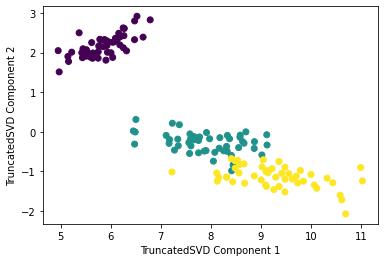

In [15]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# scatter plot 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

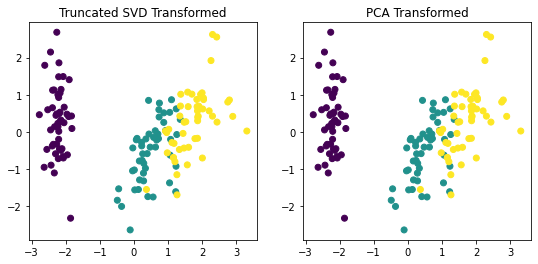

In [16]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols = 2)
ax1.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_pca[:, 0], y = iris_pca[:, 1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

=> 두 방법이 매우 유사하게 변환되고, 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성이 뛰어난 고유성 가지고 있음 

# 5. NMF (Non-Negative Matrix Factorization)<br>
* NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭<br>
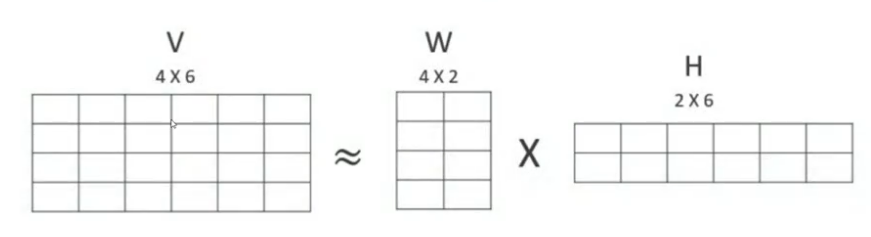

* 행렬 분해(Matrix Factorization)
 * 행렬 분해는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것
 * 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W와 작고 넓은 행렬 H로 분해됨
 * 이렇게 분해된 행렬은 Latent Factor(잠재요소)를 특성으로 가지게 됨
 * 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬<br>
 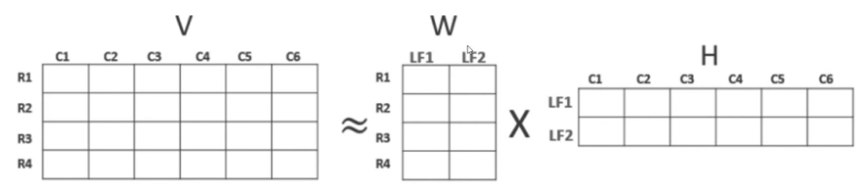

* 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환 후 시각화

C:\Users\gram\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

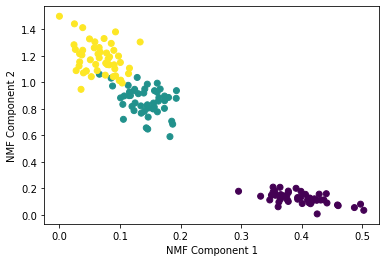

In [17]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:, 0], y = iris_nmf[:, 1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')